## This notebook test functions to compute metrics in process.py

In [1]:
import sys, os
sys.path.insert(1, os.getcwd() + '\..\src')
sys.path.insert(1, os.getcwd() + '/../src')
sys.path.insert(1, os.getcwd() + '\..\data')
sys.path.insert(1, os.getcwd() + '/../data')

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from process import *

In [3]:
try:
    input_df = pd.read_csv('..\data\Sessions2_20221020.csv')
except:
    input_df = pd.read_csv('../data/Sessions2_20221020.csv')

In [4]:
input_df.head()

,dcosId,userId,vehicle_model,vehicle_maxChgRate_W,siteId,stationId,connectTime,startChargeTime,Deadline,energyReq_Wh,...,sch_centsPerOverstayHr,Duration,DurationHrs,choice,regular,scheduled,cumEnergy_Wh,peakPower_W,power,lastUpdate
0,24,605,500e,6600,23,7,2020-11-05T10:30:16,2020-11-05T10:31:09,NaN,NaN,...,200.0,0 days 03:43:57,3.73249,REGULAR,1,0,3281.0,6335,"[{'power_W': Decimal('6259'), 'timestamp': Dec...",2020-11-05T14:15:06
1,26,486,Model 3,24000,23,3,2020-11-11T07:39:55,2020-11-11T07:39:59,NaN,NaN,...,200.0,0 days 06:50:07,6.83527,REGULAR,1,0,33458.0,7005,"[{'power_W': Decimal('0'), 'timestamp': Decima...",2020-11-11T14:30:06
2,30,620,Volt,3600,25,12,2020-11-13T16:19:55,2020-11-13T16:20:06,2020-11-14T04:15:00,18400.0,...,300.0,0 days 20:40:02,20.66722,SCHEDULED,0,1,15216.0,3450,"[{'power_W': Decimal('0'), 'timestamp': Decima...",2020-11-14T13:00:08
3,31,618,Bolt,7200,23,6,2020-11-14T23:47:06,2020-11-14T23:47:16,NaN,NaN,...,400.0,0 days 02:12:51,2.21416,REGULAR,1,0,14378.0,6889,"[{'power_W': Decimal('6889'), 'timestamp': Dec...",2020-11-15T02:00:07
4,32,623,B-Class Electric Drive,6000,23,9,2020-11-16T11:38:44,2020-11-16T11:42:22,NaN,NaN,...,NaN,0 days 03:12:45,3.21249,REGULAR,1,0,12484.0,6852,"[{'power_W': Decimal('6813'), 'timestamp': Dec...",2020-11-16T14:55:07


In [5]:
input_df.columns

Index(['dcosId', 'userId', 'vehicle_model', 'vehicle_maxChgRate_W', 'siteId',
       'stationId', 'connectTime', 'startChargeTime', 'Deadline',
       'energyReq_Wh', 'estCost', 'reg_centsPerHr', 'sch_centsPerHr',
       'sch_centsPerKwh', 'sch_centsPerOverstayHr', 'Duration', 'DurationHrs',
       'choice', 'regular', 'scheduled', 'cumEnergy_Wh', 'peakPower_W',
       'power', 'lastUpdate'],
      dtype='object')

In [6]:
input_df = compute_slack(input_df)

<AxesSubplot: xlabel='Slack_Hr', ylabel='Count'>

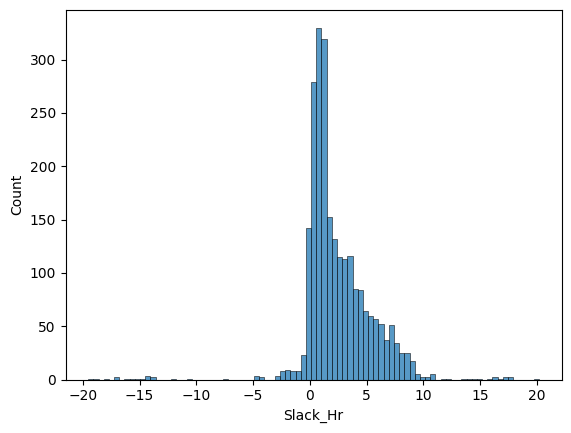

In [7]:
sns.histplot(data=input_df, x="Slack_Hr")

In [33]:
daily_revenue = compute_revenue(input_df, interval='day')

/var/folders/rn/6p4_n9750412mw__zxkgbzcm0000gn/T/ipykernel_39002/1489562335.py:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  sns.lineplot(data=daily_revenue.reset_index()[daily_revenue.reset_index()['connectTime'] > (pd.to_datetime("now") - pd.Timedelta(50, "day"))], x="connectTime", y="estCost")


(array([19252., 19256., 19260., 19264., 19266., 19270., 19274., 19278.,
        19282., 19286.]),
 [Text(19252.0, 0, '2022-09-17'),
  Text(19256.0, 0, '2022-09-21'),
  Text(19260.0, 0, '2022-09-25'),
  Text(19264.0, 0, '2022-09-29'),
  Text(19266.0, 0, '2022-10-01'),
  Text(19270.0, 0, '2022-10-05'),
  Text(19274.0, 0, '2022-10-09'),
  Text(19278.0, 0, '2022-10-13'),
  Text(19282.0, 0, '2022-10-17'),
  Text(19286.0, 0, '2022-10-21')])

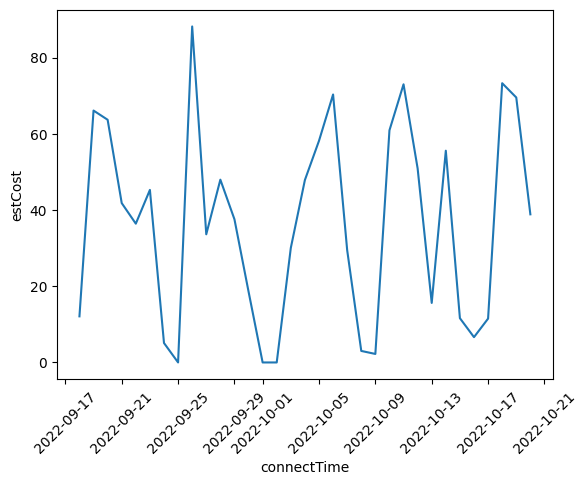

In [59]:
# plot the revenue for the past 50 days
sns.lineplot(data=daily_revenue.reset_index()[daily_revenue.reset_index()['connectTime'] > (pd.to_datetime("now") - pd.Timedelta(50, "day"))], x="connectTime", y="estCost")
plt.xticks(rotation=45)

In [31]:
weekly_revenue = compute_revenue(input_df, interval='week')

/var/folders/rn/6p4_n9750412mw__zxkgbzcm0000gn/T/ipykernel_39002/3409462948.py:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  sns.lineplot(data=weekly_revenue.reset_index()[weekly_revenue.reset_index()['connectTime'] > (pd.to_datetime("now") - pd.Timedelta(10, "W"))], x="connectTime", y="estCost")


(array([19243., 19250., 19257., 19266., 19273., 19280., 19287.]),
 [Text(19243.0, 0, '2022-09-08'),
  Text(19250.0, 0, '2022-09-15'),
  Text(19257.0, 0, '2022-09-22'),
  Text(19266.0, 0, '2022-10-01'),
  Text(19273.0, 0, '2022-10-08'),
  Text(19280.0, 0, '2022-10-15'),
  Text(19287.0, 0, '2022-10-22')])

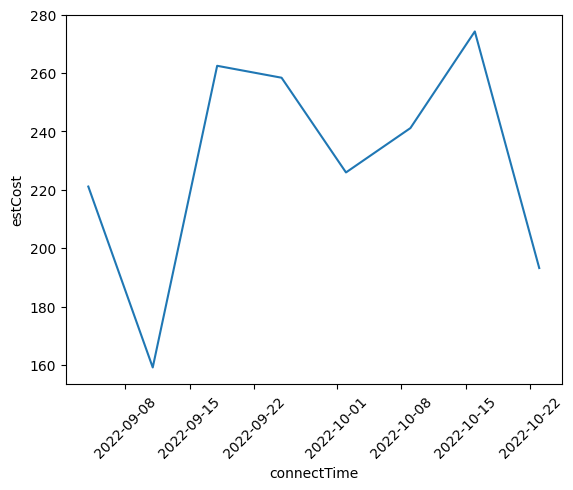

In [62]:
# plot the revenue for the past 10 weeks
sns.lineplot(data=weekly_revenue.reset_index()[weekly_revenue.reset_index()['connectTime'] > (pd.to_datetime("now") - pd.Timedelta(10, "W"))], x="connectTime", y="estCost")
plt.xticks(rotation=45)

In [42]:
monthly_revenue = compute_revenue(input_df, interval='month')

/var/folders/rn/6p4_n9750412mw__zxkgbzcm0000gn/T/ipykernel_39002/2883966575.py:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  sns.lineplot(data=monthly_revenue.reset_index()[monthly_revenue.reset_index()['connectTime'] > (pd.to_datetime("now") - pd.Timedelta(360, "days"))], x="connectTime", y="estCost")


(array([18993., 19052., 19113., 19174., 19236., 19297.]),
 [Text(18993.0, 0, '2022-01'),
  Text(19052.0, 0, '2022-03'),
  Text(19113.0, 0, '2022-05'),
  Text(19174.0, 0, '2022-07'),
  Text(19236.0, 0, '2022-09'),
  Text(19297.0, 0, '2022-11')])

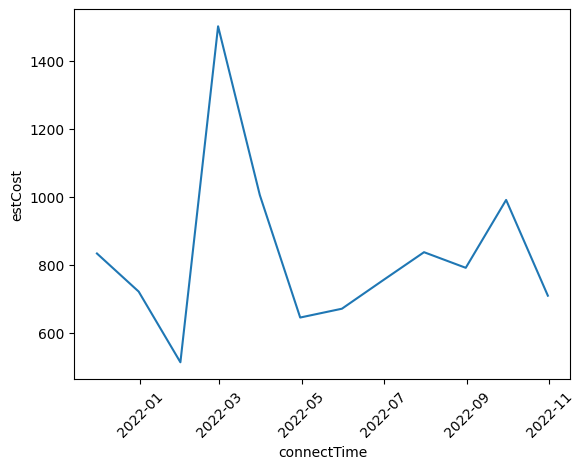

In [67]:
# plot revenue for the last year
sns.lineplot(data=monthly_revenue.reset_index()[monthly_revenue.reset_index()['connectTime'] > (pd.to_datetime("now") - pd.Timedelta(360, "days"))], x="connectTime", y="estCost")
plt.xticks(rotation=45)

In [ ]:
yearly_revenue = compute_revenue(input_df, interval='year')

(array([0, 1, 2]),
 [Text(0, 0, '2020-12-31T00:00:00.000000000'),
  Text(1, 0, '2021-12-31T00:00:00.000000000'),
  Text(2, 0, '2022-12-31T00:00:00.000000000')])

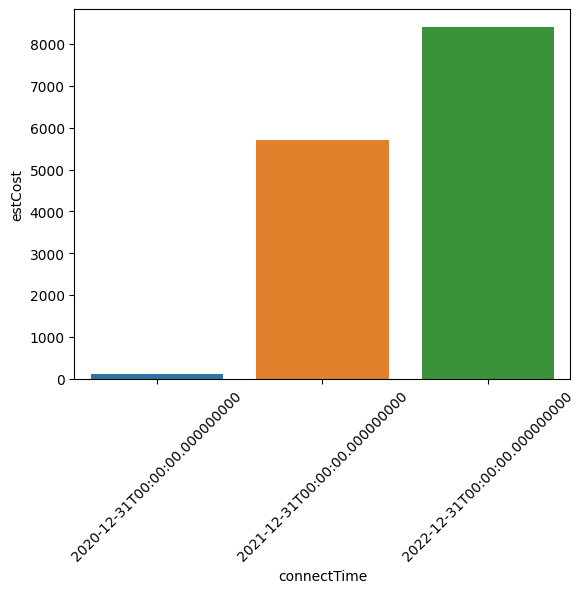

In [68]:
# plot yearly revenue
sns.barplot(data=yearly_revenue.reset_index(), x="connectTime", y="estCost")
plt.xticks(rotation=45)

In [69]:
yearly_revenue = compute_revenue(input_df, interval='century')

InvervalError: 